In [2]:
import numpy as np
import pandas as pd
import joblib

In [3]:
df=pd.read_csv('../data/processed/unique.csv')

In [4]:
df.head()

,index,Brand,Mobile Name,Front Camera (in MP),Primary Camera (in MP),Memory,RAM,Processor Performance,Battery Power(in mAh),Screen Height,Screen Width,Ratings,Price,Mobile Category,Price Range,Cluster
0,0,Apple,iPhone 14 Pro Max,32,200,1024,24,5.0,1074.0,2520,1080,4.0,119405.30,Flagship,130000-140000,2
1,1,Apple,iPhone 14 Pro Max,32,200,512,24,5.0,1074.0,2520,1080,4.9,113962.24,Flagship,110000-120000,2
2,2,Apple,iPhone 14 Pro,32,200,512,24,5.0,1086.0,2460,1080,3.4,222232.56,Flagship,220000-230000,2
3,4,Apple,iPhone 14 Pro Max,32,200,1024,16,5.0,1074.0,2520,1080,4.2,219022.20,Flagship,210000-220000,2
4,6,Apple,iPhone 12 Pro,32,108,1024,16,5.0,1788.5,2660,1170,4.4,216084.16,Flagship,210000-220000,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1316 non-null   int64  
 1   Brand                   1316 non-null   object 
 2   Mobile Name             1316 non-null   object 
 3   Front Camera (in MP)    1316 non-null   int64  
 4   Primary Camera (in MP)  1316 non-null   int64  
 5   Memory                  1316 non-null   int64  
 6   RAM                     1316 non-null   int64  
 7   Processor Performance   1316 non-null   float64
 8   Battery Power(in mAh)   1316 non-null   float64
 9   Screen Height           1316 non-null   int64  
 10  Screen Width            1316 non-null   int64  
 11  Ratings                 1316 non-null   float64
 12  Price                   1316 non-null   float64
 13  Mobile Category         1316 non-null   object 
 14  Price Range             1316 non-null   

Prepare Dataset

In [6]:
from sklearn.model_selection import train_test_split


# Define the features and target variable
features = ['Battery Power(in mAh)', 'RAM', 'Memory', 'Processor Performance', 'Primary Camera (in MP)','Front Camera (in MP)']
target = 'Price'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler
joblib.dump(scaler, '../models/mainscaler.joblib')

['../models/mainscaler.joblib']

In [7]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

model =GradientBoostingRegressor()
model.fit(X_train_normalized, y_train)



GradientBoostingRegressor()

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score


y_pred = model.predict(X_train_normalized)

mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

rmse=root_mean_squared_error(y_train, y_pred)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_train, y_pred)
print(f'R2 Score: {r2}')


Mean Absolute Error: 8482.073013695064
Mean Squared Error: 157457091.67750084
Root Mean Squared Error: 12548.190773075648
R2 Score: 0.9140165782742022


In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score


y_pred = model.predict(X_test_normalized)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse=root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


Mean Absolute Error: 11220.241686404563
Mean Squared Error: 277000253.7585879
Root Mean Squared Error: 16643.324600529424
R2 Score: 0.8284075632850867


In [10]:
np.mean(y_test)

np.float64(49606.58496212121)

In [11]:
np.mean(model.predict(X_test_normalized))

np.float64(50047.12800101966)

In [12]:

# Save the model using joblib
joblib_filename = '../models/myreg.joblib'
joblib.dump(model, joblib_filename)


['../models/myreg.joblib']

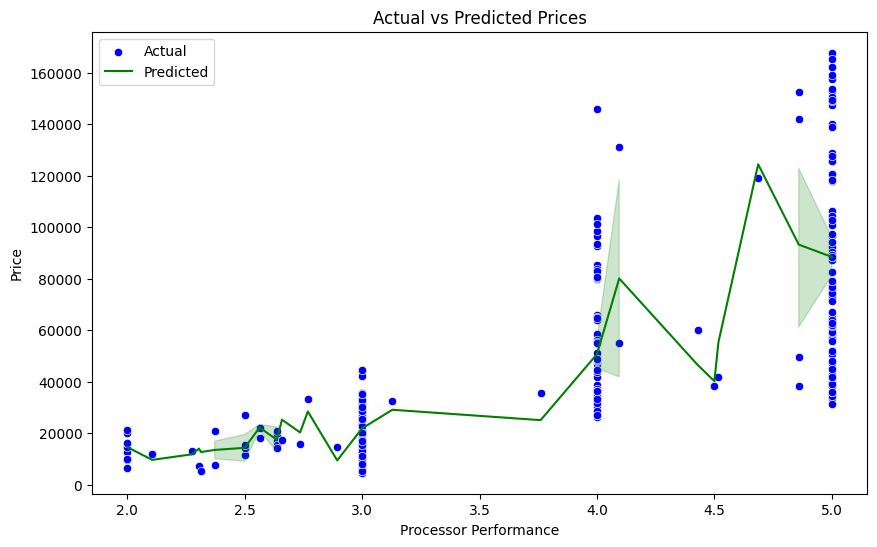

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Processor Performance': X_test['Processor Performance'],
    'RAM': X_test['RAM'],
    'Memory': X_test['Memory'],
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Plot the actual data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Processor Performance', y='Actual Price', data=plot_data, label='Actual', color='blue')

# # Plot the prediction line
sns.lineplot(x='Processor Performance', y='Predicted Price', data=plot_data, label='Predicted', color='green')

# Add titles and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Processor Performance')
plt.ylabel('Price')
plt.legend()
plt.show()


<Axes: >

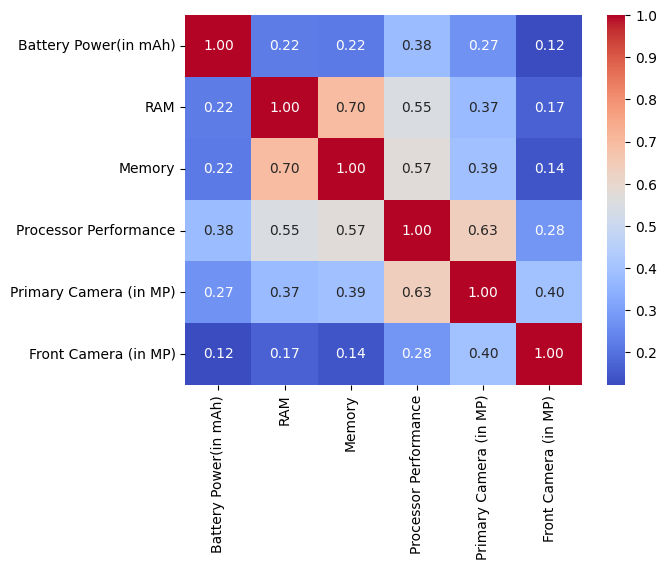

In [14]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')

Classification

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
features = ['Battery Power(in mAh)', 'RAM', 'Memory', 'Processor Performance', 'Primary Camera (in MP)','Front Camera (in MP)']
target = 'Mobile Category'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()   

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler
joblib.dump(scaler, '../models/classifyscaler.joblib')

['../models/classifyscaler.joblib']

In [16]:
from collections import Counter
class_counts = Counter(y)
total_samples = len(y)
class_weights = {cls: total_samples / count for cls, count in class_counts.items()}

In [17]:
class_weights

{'Flagship': 6.326923076923077,
 'Midrange': 3.509333333333333,
 'Budget': 1.795361527967258}

In [18]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model=SVC()

model.fit(X_train_normalized, y_train)


SVC()

Accuracy: 0.9096958174904943
Classification Report: 
              precision    recall  f1-score   support

      Budget       0.95      0.96      0.96       587
    Flagship       0.92      0.83      0.87       172
    Midrange       0.83      0.86      0.84       293

    accuracy                           0.91      1052
   macro avg       0.90      0.88      0.89      1052
weighted avg       0.91      0.91      0.91      1052



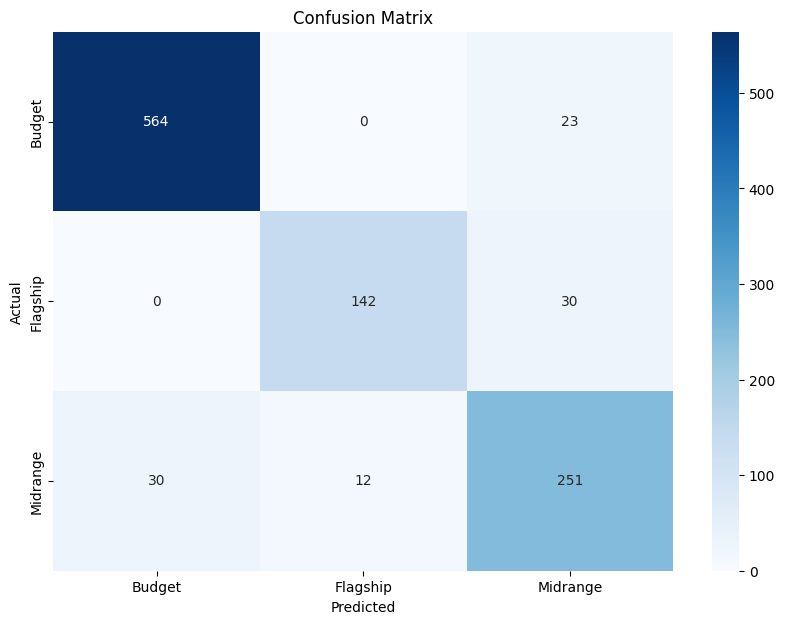

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_pred = model.predict(X_train_normalized)

accuracy = accuracy_score(y_train, y_pred)
cr=classification_report(y_train, y_pred)
cm=confusion_matrix(y_train, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{cr}')

cm = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8901515151515151
Classification Report: 
              precision    recall  f1-score   support

      Budget       0.91      0.97      0.94       146
    Flagship       0.91      0.81      0.85        36
    Midrange       0.84      0.79      0.82        82

    accuracy                           0.89       264
   macro avg       0.89      0.85      0.87       264
weighted avg       0.89      0.89      0.89       264



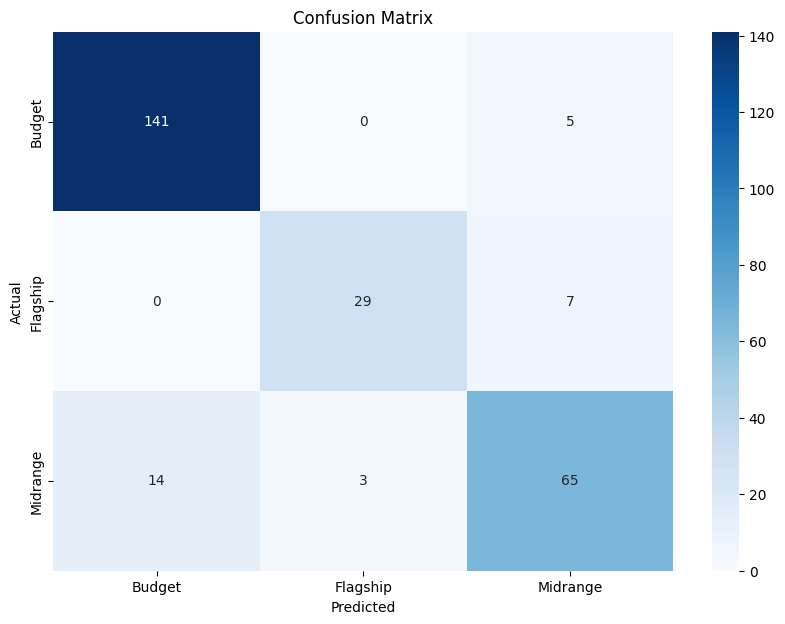

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_pred = model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
cr=classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{cr}')

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:

# Save the model using joblib
joblib_filename = '../models/myclassify.joblib'
joblib.dump(model, joblib_filename)


['../models/myclassify.joblib']

In [22]:
model.predict(X_test_normalized)[0]

'Midrange'

Clustering

In [25]:
from sklearn.model_selection import train_test_split


# Define the features and target variable
features = ['Battery Power(in mAh)', 'RAM', 'Memory', 'Processor Performance', 'Primary Camera (in MP)','Front Camera (in MP)',"Price"]
target = 'Mobile Category'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler
joblib.dump(scaler, '../models/kmeanscaler.joblib')

['../models/kmeanscaler.joblib']

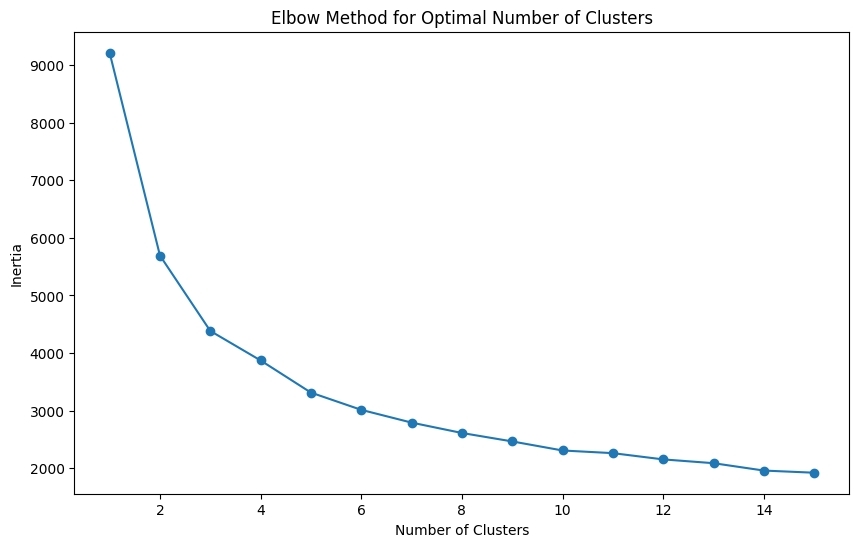

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset
data = pd.read_csv("../data/processed/unique.csv")

# Select the features you want to use for clustering
features = data[["Battery Power(in mAh)", "RAM", "Memory", "Processor Performance", "Primary Camera (in MP)", "Front Camera (in MP)", "Price"]]


features_scaled = scaler.fit_transform(features)

# Apply KMeans for different values of n_clusters and calculate the inertia
inertia = []
n_clusters_range = range(1, 16)  # You can adjust the range as needed

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [31]:
df.sort_values(by=['Mobile Category',"Cluster"],ascending=[True,False]).head(30)

,index,Brand,Mobile Name,Front Camera (in MP),Primary Camera (in MP),Memory,RAM,Processor Performance,Battery Power(in mAh),Screen Height,Screen Width,Ratings,Price,Mobile Category,Price Range,Cluster
583,1237,Apple,iPhone 11,32,200,256,6,3.000000,1339.5,1560,720,4.40,39191.75,Budget,30000-40000,4
589,1250,Vivo,Vivo X90 Pro,32,200,128,6,4.000000,1413.0,2400,1080,4.60,38653.08,Budget,30000-40000,4
592,1255,Apple,iPhone 11,32,200,64,8,3.000000,1339.5,1560,720,4.70,38482.29,Budget,30000-40000,4
597,1260,Apple,iPhone 11,32,200,128,6,3.000000,1339.5,1560,720,4.10,38406.32,Budget,30000-40000,4
609,1277,Realme,Realme GT 3,32,200,64,8,4.000000,1299.0,1560,720,2.60,37938.08,Budget,30000-40000,4
617,1301,Realme,Realme GT Neo 5,32,200,64,4,4.000000,1348.0,2340,1080,4.10,36861.70,Budget,30000-40000,4
618,1302,Realme,Realme GT 3,32,200,128,8,4.000000,1299.0,1560,720,4.60,36832.37,Budget,30000-40000,4
622,1307,Apple,iPhone XR,32,200,128,8,3.000000,869.5,1540,720,3.66,36721.53,Budget,30000-40000,4
625,1312,Motorola,Moto G200,32,200,128,6,4.094725,1519.0,2460,1080,4.00,36639.49,Budget,30000-40000,4
627,1317,RedMi,Redmi Note 12 Pro+,32,200,128,4,4.000000,1465.0,1970,900,3.10,36441.92,Budget,30000-40000,4
